## Regression

El precio del móvil depende de varios factores, como la resolución, la marca, el tamaño, el peso, la calidad de imagen, la memoria RAM, la batería y la potencia de la CPU. En este conjunto de datos, queremos estimar el precio de los teléfonos móviles que utilizan las funciones anteriores.

  



### Realiza un estudio comparativo de los modelos de regresión lineal simple y regresión lineal múltiple (aplicando métodos de selección de variables).

Importamos las librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [2]:
#!pip install mlxtend

Cargamos el dataset

In [3]:
dataset = pd.read_csv("../data/Cellphone.csv")

In [4]:
dataset.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [5]:
X = dataset.drop(["Price", "Product_id"], axis = 1)
y = dataset["Price"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [8]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [9]:
def r2_adj(y_pred, X_test, r2):
    N = y_pred.shape[0]
    p = X_test.shape[1]
    k = (1-r2)
    w = (N-1)/(N-p-1)
    adj_r2 = 1-(k*w)
    
    return adj_r2

In [10]:
#Declaramos el dataframe que recogerá los resultados
dataset_seleccion = pd.DataFrame()
#inicializamos el bucle for que irá desde 1 hasta el número de variables más 1
for i in range(1, len(X_train_df.columns)+1):
    #declaramos la función de selección de variables pasándole el modelo, el número de variables y la dirección
    sbs = SFS(LinearRegression(), k_features = i, forward = False)
    #entrenamos la selección de variables
    sbs.fit(np.array(X_train), y_train)
    #declaramos nuestro modelo de regresión lineal
    regression = LinearRegression()
    #generamos una variable para guardar las columnas seleccionadas
    columnas = [X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]
    #entrenamos el modelo de regresión
    regression.fit(X_train_df[columnas], y_train)
    #hacemos la predicción sobre X_test con las columnas seleccionadas
    y_pred = regression.predict(X_test_df[columnas])
    #Calculamos r2
    r2 = r2_score(y_test, y_pred)
    #Calculamos r2 ajustado
    adj_r2 = r2_adj(y_pred, X_test_df[columnas], r2)
    #calculames el rmse 
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    mse = math.sqrt(mean_squared_error(y_test, y_pred))
    #calculamos el mae
    mae = mean_absolute_error(y_test, y_pred)
    #montamos el fataframe de resultados de la iteración en la que nos encontramos
    df_res = pd.DataFrame({"variables": [columnas], "r2_adj": adj_r2, "rmse": rmse, "mae": mae, "mse":mse})
    #concatenamos los resultados al dataframe inicial
    dataset_seleccion = pd.concat([dataset_seleccion, df_res], ignore_index = True)

In [11]:
dataset_seleccion.sort_values(by = "rmse", ascending = True, ignore_index = True)

,variables,r2_adj,rmse,mae,mse
0,"[Sale, weight, resoloution, ppi, cpu core, cpu...",0.933659,158.284640,134.948333,158.284640
1,"[weight, resoloution, ppi, cpu core, cpu freq,...",0.933177,163.211770,134.833733,163.211770
2,"[weight, resoloution, ppi, cpu core, cpu freq,...",0.931137,163.489553,136.201068,163.489553
3,"[resoloution, ppi, cpu core, cpu freq, interna...",0.933597,164.823696,136.157900,164.823696
4,"[resoloution, ppi, cpu core, cpu freq, interna...",0.933332,167.257447,137.244539,167.257447
5,"[ppi, cpu core, cpu freq, internal mem, ram, b...",0.922626,182.425645,143.331227,182.425645
6,"[ppi, cpu core, internal mem, ram, battery, th...",0.918484,189.514083,146.374837,189.514083
7,"[ppi, cpu core, internal mem, ram, thickness]",0.919745,190.267390,152.946722,190.267390
8,"[ppi, cpu core, ram, thickness]",0.916109,196.779446,151.151144,196.779446
9,"[ppi, ram, thickness]",0.896123,221.442276,174.419596,221.442276


In [12]:
dataset_seleccion.sort_values(by = "rmse", ascending = True, ignore_index = True)["variables"][0]

['Sale',
 'weight',
 'resoloution',
 'ppi',
 'cpu core',
 'cpu freq',
 'internal mem',
 'ram',
 'RearCam',
 'Front_Cam',
 'battery',
 'thickness']

In [13]:
X.columns

Index(['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

Preprocesado de datos

In [14]:
dataset.isna().mean()

Product_id      0.0
Price           0.0
Sale            0.0
weight          0.0
resoloution     0.0
ppi             0.0
cpu core        0.0
cpu freq        0.0
internal mem    0.0
ram             0.0
RearCam         0.0
Front_Cam       0.0
battery         0.0
thickness       0.0
dtype: float64

In [15]:
dataset.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

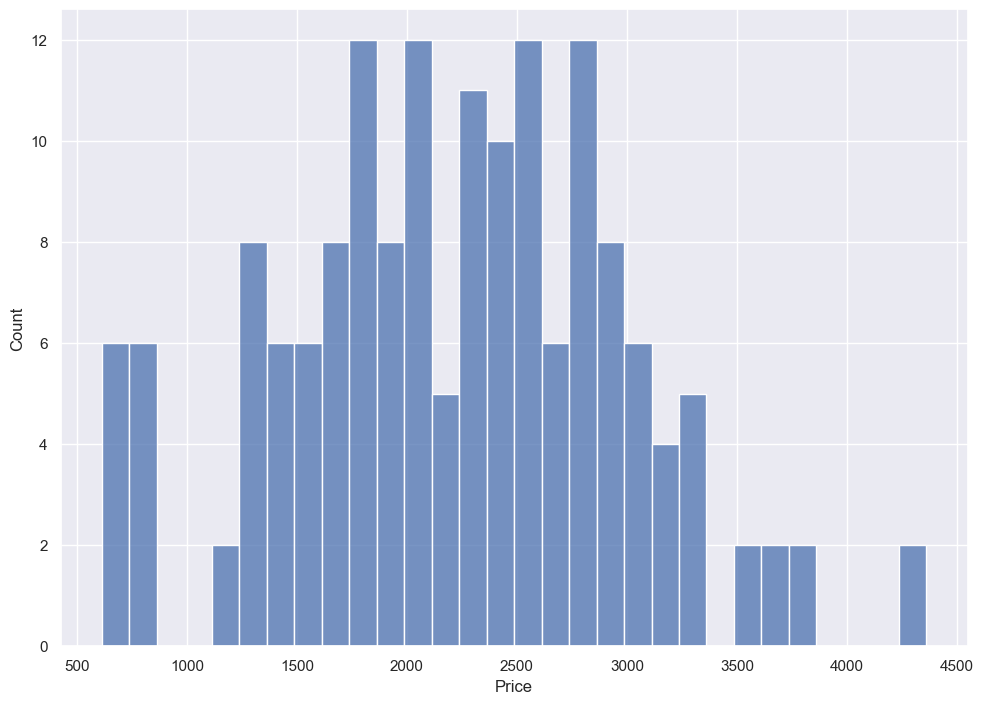

In [38]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(dataset['Price'], bins=30)
plt.show()

Vemos las correlaciones entre variables.

In [17]:
correlation_matrix = dataset.corr().round(2)

<Axes: >

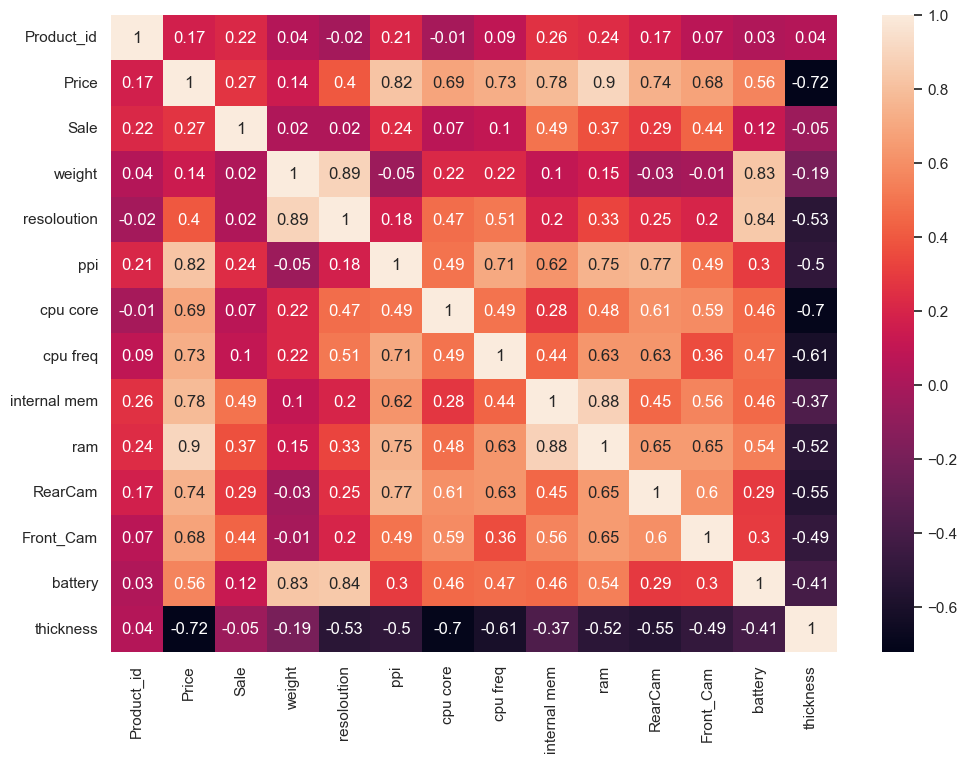

In [18]:
sns.heatmap(data=correlation_matrix, annot=True)

In [19]:
X = pd.DataFrame(dataset['ram'], columns = ['ram'])
Y = dataset['Price']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 1)
(33, 1)
(128,)
(33,)


# **Linear Regression**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 347.60221044374936
R2 score is 0.796260563531513


The model performance for testing set
--------------------------------------
RMSE is 301.53061049126865
R2 score is 0.837018349705044


# **MULTIPLE REGRESION**

### OPCIÓN 1

In [23]:
X = pd.DataFrame(np.c_[dataset['ram'], dataset['ppi']], columns = ['ram', 'ppi'])
Y = dataset['Price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 2)
(33, 2)
(128,)
(33,)


In [25]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 299.7290838608417
R2 score is 0.8485156338517648


The model performance for testing set
--------------------------------------
RMSE is 270.11794037139015
R2 score is 0.8692075255579859


# Opción 2

In [27]:
dataset = pd.read_csv("../data/Cellphone.csv")

In [28]:
X = dataset.drop("Price", axis = 1)
Y = dataset['Price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128, 13)
(33, 13)
(128,)
(33,)


In [30]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [32]:
dataset_seleccion = pd.DataFrame()
for i in range(1, len(X_train_df.columns)):
    sbs = SFS(LinearRegression(),k_features=i,forward=False,floating=False)
    sbs.fit(np.array(X_train), y_train)
    sbs.k_feature_names_
    regression = LinearRegression()
    regression.fit(X_train_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],
                   y_train)
    y_pred = regression.predict(X_test_df[[X_train_df.columns[int(index)]
                                           for index in list(sbs.k_feature_idx_)]])
    r2 = r2_score(y_pred = y_pred, y_true = y_test)
    dataset_seleccion = pd.concat([dataset_seleccion,pd.DataFrame({
        "variables":[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],
        "r2": r2})],ignore_index = True)


In [33]:
dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)

,variables,r2
0,"[resoloution, ppi, cpu core, cpu freq, interna...",0.937545
1,"[Sale, resoloution, ppi, cpu core, cpu freq, i...",0.929590
2,"[Sale, weight, resoloution, ppi, cpu core, cpu...",0.929010
3,"[Sale, resoloution, ppi, cpu core, cpu freq, i...",0.928785
4,"[Sale, resoloution, ppi, cpu core, cpu freq, i...",0.918362
5,"[resoloution, cpu core, cpu freq, internal mem...",0.913207
6,"[Sale, resoloution, ppi, cpu core, cpu freq, i...",0.901489
7,"[resoloution, cpu core, cpu freq, internal mem...",0.899672
8,"[cpu core, cpu freq, internal mem, thickness]",0.892318
9,"[cpu core, cpu freq, internal mem]",0.889094


In [34]:
X = dataset[dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)["variables"][0]]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 7)
(33, 7)
(128,)
(33,)


In [36]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 180.7023300930161
R2 score is 0.9449398301336897


The model performance for testing set
--------------------------------------
RMSE is 186.65743674312108
R2 score is 0.9375451036054108
